### **PR0206: Ingesta de datos financieros en InfluxDB**

### **Objetivo de la Práctica**

En esta práctica vamos a crear un un agente de ingestión en Python que lea múltiples ficheros CSV de cotizaciones, los procese y los almacene de manera eficiente en un Bucket de InfluxDB, aplicando el modelo de datos correcto (Tags y Fields).

Para ello vamos a trabajar con el dataset Cryptocurrency Historical Prices de Kaggle, que contiene datos sobre la evolución de precios de 23 criptomonedas entre los años 2017 y 2021.

Para realizar esta práctica tienes que tener en cuenta lo siguiente:

- Nombre del bucket: crypto_raw.
- Measurement: daily_quote
Y Mapearás las siguientes columnas del fichero CSV.

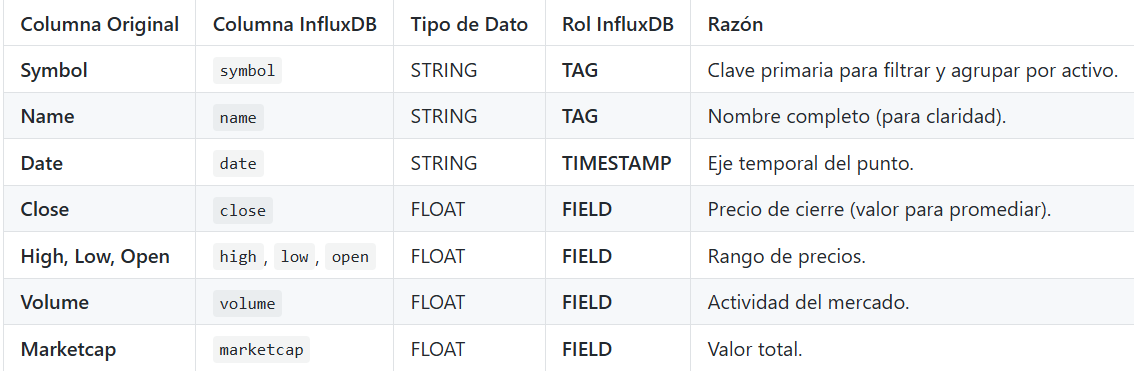

Debes desarrollar el script ``ingesta_crypto.py`` que realice los siguientes pasos:

1. Usa el módulo ``os`` para listar los 23 ficheros en el directorio ``/data/crypto_files/``.
2. Configura el ``InfluxDBClient`` y la ``WriteAPI`` en **modo Asíncrono (ASYNCHRONOUS)** con un tamaño de batch definido (p.e. **5000 puntos**).
3. Inicializa un contador global de puntos insertados.
4. Dentro del **bucle** de lectura de ficheros (usando el módulo ``csv.reader`` para manejo de CSV):
- Omite la primera línea (cabecera) de cada fichero.
- Asegúrate de convertir los campos (``Close``, ``Volume``, ``Marketcap``, etc.) ``float`` antes de ser asignados al ``Point``.
- Por cada fila, construye un objeto ``Point`` que respete el modelo definido, usando el campo ``Date`` como el ``Timestamp`` del punto.
5. Después de procesar cada fichero, imprime un mensaje (``Ej: Fichero BTC.csv procesado``).
6. Al finalizar el bucle de ficheros, llamar a **``write_api.close()``** para vaciar los puntos restantes del buffer antes de que el script termine.



## **Entrega**

El fichero Markdown de la entrega debe incluir:
1. El script ``ingesta_crypto.py`` funcionando.
2. Captura de pantalla de la terminal mostrando el **total de puntos insertados** (que debe ser la suma de todas las filas en los 23 ficheros).
3. Captura de pantalla de la interfaz web de InfluxDB (``Data Explorer``) mostrando un gráfico de la métrica ``close`` para el activo **BTCUSDT**, verificando que los datos se han cargado correctamente.